In [1]:
import pandas as pd
from calendar import monthrange
from matplotlib import pyplot as plt
import numpy as np
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
%matplotlib inline

<font color='green'>
### 1

- Тренд
- Цикл
- Сезонность
- Ошибка

<font color='green'>
### 2

- Временные ряды, как правило, автокоррелированы, то есть, их значения в каждый момент времени в каком-то смысле похожи на значения в недавнем прошлом.

<font color='green'>
### 3

- Константа α
- p предыдущих значений ряда с постоянными коэффициентами
- Ошибка εt

<font color='green'>
### 4

- Значения коэффициентов ϕ и θ перед предыдущими значениями ряда и предыдущими значениями ошибки
- Значение константы α

<font color='green'>
### 5

- Анализ частичной автокорреляционной функции

<font color='green'>
### 6

In [2]:
df_milk = pd.read_csv('monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
df_milk[['milk']] = df_milk[['milk']].astype(float)
df_milk2 = pd.DataFrame.copy(df_milk, deep=True)
for i in xrange(df_milk.shape[0]):
    year = int(str(df_milk.index[i]).split('-')[0])
    month = int(str(df_milk.index[i]).split('-')[1])
    df_milk2.milk[i] =  df_milk.milk[i] / float(monthrange(year, month)[1])
df_milk2.head()

,milk
month,
1962-01-01,589.000000
1962-02-01,20.035714
1962-03-01,20.645161
1962-04-01,21.866667
1962-05-01,23.451613


In [3]:
df_milk2.milk[0] = 589. / 31
print df_milk2.milk[0]

19.0


In [4]:
df_milk2.milk[96] = 750. / 31
print df_milk2.milk[96]

24.1935483871


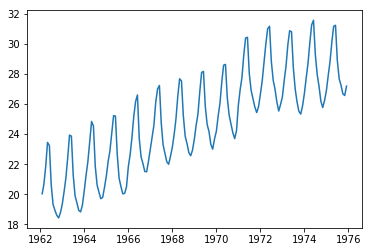

In [5]:
plt.figure()
plt.plot(df_milk2[1:])
plt.show()

<font color='green'>
### 7

In [6]:
df_milk2.diff_1 = df_milk2.milk - df_milk2.milk.shift(1)
print 'p_value =', adfuller(df_milk2.diff_1.dropna())[1]

p_value = 1.53239608811e-25


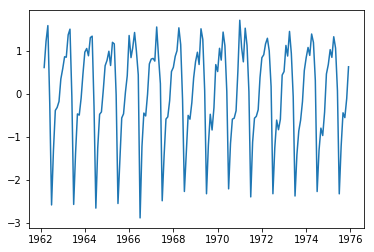

In [7]:
plt.figure()
plt.plot(df_milk2.diff_1[2:])
plt.show()

In [8]:
df_milk2.diff_season = df_milk2.milk - df_milk2.milk.shift(12)
print 'p_value =', adfuller(df_milk2.diff_season.dropna())[1]

p_value = 0.007474351837


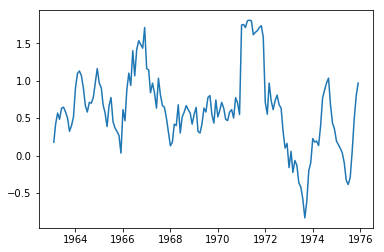

In [9]:
plt.figure()
plt.plot(df_milk2.diff_season[13:])
plt.show()

In [10]:
df_milk2.diff_season1 = df_milk2.diff_season - df_milk2.diff_season.shift(1)
print 'p_value =', adfuller(df_milk2.diff_season1.dropna())[1]

p_value = 0.00803203629683


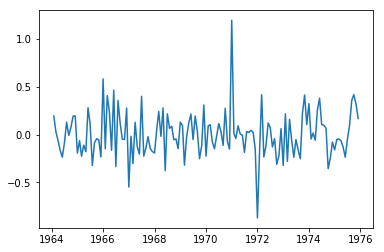

In [11]:
plt.figure()
plt.plot(df_milk2.diff_season1[25:])
plt.show()

- Ряд становится стационарным после двух последовательных дифференцирований — сезонного и обычного

<font color='green'>
### 8

Q = 12 / 12 = 1

In [157]:
df_milk2.dropna().head()

,milk
month,
1962-01-01,589.000000
1962-02-01,20.035714
1962-03-01,20.645161
1962-04-01,21.866667
1962-05-01,23.451613


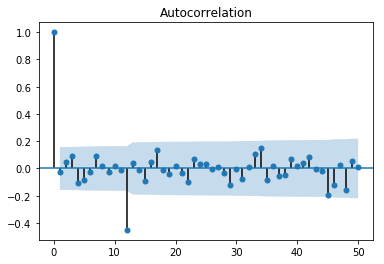

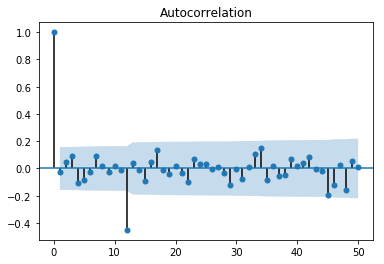

In [165]:
sm.graphics.tsa.plot_acf(df_milk2.diff_season1[14:].squeeze(), lags=50)

<font color='green'>
### 9

p = 0

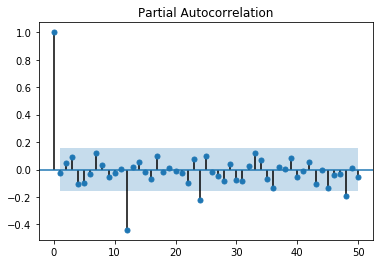

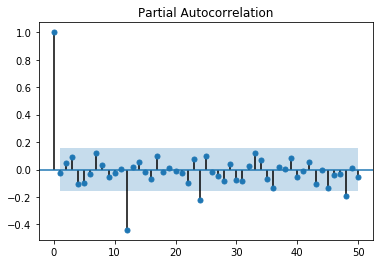

In [17]:
sm.graphics.tsa.plot_pacf(df_milk2.diff_season1.squeeze()[14:], lags=50)